### Data Processing
---

All data is stored in 'Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LaFleur
---

In [158]:
LaFleur_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='La Fleur et al (Fig 1d, S1)')
LaFleur_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/1 LaFleur.csv', index=False)
LaFleur_df.head()

,ID,DNA1 [counts],DNA2 [counts],DNA3 [counts],RNA1 [counts],RNA2 [counts],RNA3 [counts],TX1 [au],TX2 [au],TX3 [au],...,high quality,Observed log(TX/Txref),Predicted log(TX/Txref),dG10,dG35,dGDisc,dGITR,dGEXT10,dGSPAC,dGUP
0,0,8263,7261,5173,16341,10320,13506,2.258071,1.523795,1.545541,...,Yes,-3.386326,-3.844827,-1.781524,-1.477218,-0.106428,-0.021112,0.191352,-0.0924,0.400862
1,1,5600,4886,3264,10986,7250,10800,2.240001,1.590845,1.958709,...,Yes,-3.503140,-3.905283,-1.781524,-1.477218,-0.166884,-0.021112,0.191352,-0.0924,0.400862
2,2,7898,6790,4752,19572,32204,30585,2.829533,5.084911,3.810029,...,Yes,-4.207206,-3.905283,-1.781524,-1.477218,-0.166884,-0.021112,0.191352,-0.0924,0.400862
3,3,10651,9875,6466,15734,16246,18908,1.686729,1.763814,1.731036,...,Yes,-3.392439,-3.877808,-1.781524,-1.477218,-0.139409,-0.021112,0.191352,-0.0924,0.400862
4,4,12188,10793,6965,28609,21796,26803,2.680198,2.165100,2.278025,...,Yes,-3.698903,-3.672384,-1.781524,-1.477218,0.066015,-0.021112,0.191352,-0.0924,0.400862


In [159]:
LaFleur_df.rename(columns={'UP': 'upstream_of_h35', 'spacs': 'spacer'}, inplace=True)
LaFleur_df['downstream_of_h10'] = LaFleur_df['disc'] + LaFleur_df['ITR']
LaFleur_df['promoter'] = LaFleur_df['h35'] + LaFleur_df['spacer'] + LaFleur_df['h10'] + LaFleur_df['downstream_of_h10'].apply(lambda x: x[:6])
LaFleur_df = LaFleur_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
LaFleur_df

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCCCCGC,-3.386326
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGCGGC,-3.503140
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGCGCC,-4.207206
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATGCGGCG,-3.392439
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGGGGG,-3.698903
...,...,...,...,...,...,...,...
13476,TTTTCTATCTACGTAC,AATTGA,TATTTCCTATTTCTG,TACATA,TAGTGTTCTCTACCTTAGTTTGTACGTT,AATTGATATTTCCTATTTCTGTACATATAGTGT,-3.015626
13477,TTTTCTATCTACGTAC,AATTGA,TATTTCCTATTTCTG,TAAGTC,AGGTGTTCTCTACCTTAGTTTGTACGTT,AATTGATATTTCCTATTTCTGTAAGTCAGGTGT,-2.123137
13478,TTTTCTATCTACGTAC,AATTGA,TATTTCCTATTTCTG,TATATC,CTGTGTTCTCTACCTTAGTTTGTACGTT,AATTGATATTTCCTATTTCTGTATATCCTGTGT,-2.469796
13479,TTTTCTATCTACGTAC,AATTGA,TATTTCCTATTTCTG,TATGAA,ACGTGTTCTCTACCTTAGTTTGTACGTT,AATTGATATTTCCTATTTCTGTATGAAACGTGT,-2.070331


In [ ]:
# remove all rows where the spacer length is not 16-18

original_length = len(LaFleur_df)
LaFleur_df = LaFleur_df[(LaFleur_df['spacer'].apply(len) >= 16) & (LaFleur_df['spacer'].apply(len) <= 18)]

print(f"Removed {original_length - len(LaFleur_df)} rows with invalid promoter lengths")
print(f"Remaining rows: {len(LaFleur_df)}")

Removed 508 rows with invalid promoter lengths
Remaining rows: 12973


In [171]:
LaFleur_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/1 LaFleur.csv', index=False)

### Urtecho
---

In [256]:
Urtecho_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Urtecho et al (Fig 3c, S7b)')
Urtecho_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/2 Urtecho.csv', index=False)
Urtecho_df.head()

,ID,Promoter Sequence,Observed TX [au],Observed log(TX/Txref),Predicted log(TX/Txref),TIR [au],TIR category,Abs(residual),(residual)^2,MAE,MSE,Slope
0,0,CCTGCGTTTCCTCGCTTTTGGTGAAACGCATCTGGCTGATGTGCTG...,0.161928,-1.046080,-2.201298,403.483841,Mid,0.610618,0.365897,0.930521,1.281979,0.7526
1,1,CTGGAAGAAAACGCCAAAAAAGAAGGTGTGAATAGCACCGAATCTG...,0.238147,-1.431813,-2.609285,385.728065,Low,0.531935,0.275784,NaN,NaN,NaN
2,2,GTTAACAAACAAGGAGAAAACAGTATGAAACACGGAATTAAAGCAC...,0.170660,-1.098600,-3.094862,205.422520,Low,1.230594,1.494621,NaN,NaN,NaN
3,3,AGCCGCTTTTAGCGGACGACGTGAGTAAACAAAACCCAGACATCAT...,0.171037,-1.100808,-2.770565,907.068492,Mid,0.984319,0.954755,NaN,NaN,NaN
4,4,GTTAACAAACAAGGAGAAAACAGTATGAAACACGGAATTAAAGCAC...,13.807716,-5.491909,-3.367404,205.422520,Low,2.957601,8.799271,NaN,NaN,NaN


In [257]:
h35_list = ['TTGACA', 'TTTACA', 'ATTACA', 'TTTACC', 'TTAAGA', 'TTGCAA', 'CTCAGA', 'CTTAGA']
h10_list = ['TATAAT', 'AATAAT', 'GATAAT', 'TATAAA', 'GATAAC', 'TATGTT', 'GTTAAA', 'GTTGTA']

for idx, row in Urtecho_df.iterrows():
    promoter = row['Promoter Sequence']

    h35_matches = [h35 for h35 in h35_list if h35 in promoter]
    h10_matches = [h10 for h10 in h10_list if h10 in promoter]

    # if there are multiple matches, get the first -35 and the last -10
    if len(h35_matches) > 1:
        h35 = min(h35_matches, key=lambda x: promoter.index(x))
    else:
        h35 = h35_matches[0]
    if len(h10_matches) > 1:
        h10 = max(h10_matches, key=lambda x: promoter.index(x))
    else:
        h10 = h10_matches[0]

    up = promoter.split(h35)[0]
    down = promoter.split(h10)[-1]
    spacer = promoter.split(h35)[1].split(h10)[0]

    Urtecho_df.at[idx, 'upstream_of_h35'] = up
    Urtecho_df.at[idx, 'h35'] = h35
    Urtecho_df.at[idx, 'spacer'] = spacer
    Urtecho_df.at[idx, 'h10'] = h10
    Urtecho_df.at[idx, 'downstream_of_h10'] = down

Urtecho_df['promoter'] = Urtecho_df['h35'] + Urtecho_df['spacer'] + Urtecho_df['h10'] + Urtecho_df['downstream_of_h10'].apply(lambda x: x[:6])

Urtecho_df = Urtecho_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Urtecho_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,CCTGCGTTTCCTCGCTTTTGGTGAAACGCATCTGGCTGATGTGCTG...,ATTACA,CTTTATGCTTTTATGTT,GTTAAA,CGCACAACTGCCTTGCCGTGACGCGCTGATGCAGGA,ATTACACTTTATGCTTTTATGTTGTTAAACGCACA,-1.046080
1,CTGGAAGAAAACGCCAAAAAAGAAGGTGTGAATAGCACCGAATCTG...,CTTAGA,CTTTATGCTTCGGCTCG,AATAAT,CATTACACCGGTAAACTGATCGACGGCACCGTGTTT,CTTAGACTTTATGCTTCGGCTCGAATAATCATTAC,-1.431813
2,GTTAACAAACAAGGAGAAAACAGTATGAAACACGGAATTAAAGCAC...,ATTACA,TCGCGCATGATCGAAAG,TATAAT,AAACCGACGGCGGTAGAAACCAAAGCGGAAGCTCCT,ATTACATCGCGCATGATCGAAAGTATAATAAACCG,-1.098600
3,AGCCGCTTTTAGCGGACGACGTGAGTAAACAAAACCCAGACATCAT...,TTGACA,AAAACTCATTTTATTTT,GATAAC,CGCCGGAAACAAAACTGGCTTCTGGCCCTGCTAACC,TTGACAAAAACTCATTTTATTTTGATAACCGCCGG,-1.100808
4,GTTAACAAACAAGGAGAAAACAGTATGAAACACGGAATTAAAGCAC...,TTGACA,ATAACTTAGAAAGTAAT,TATAAA,AAACCGACGGCGGTAGAAACCAAAGCGGAAGCTCCT,TTGACAATAACTTAGAAAGTAATTATAAAAAACCG,-5.491909


In [258]:
print(Urtecho_df['spacer'].apply(lambda x: len(x)).value_counts().sort_index())
print()
print(Urtecho_df['promoter'].apply(lambda x: len(x)).value_counts().sort_index())

spacer
4       181
11      176
14      165
17    10187
20      189
Name: count, dtype: int64

promoter
22      181
29      176
32      165
35    10187
38      189
Name: count, dtype: int64


In [259]:
# remove all rows where the spacer length is not 16-18

original_length = len(Urtecho_df)
Urtecho_df = Urtecho_df[(Urtecho_df['spacer'].apply(len) >= 16) & (Urtecho_df['spacer'].apply(len) <= 18)]

print(f"Removed {original_length - len(Urtecho_df)} rows with invalid promoter lengths")
print(f"Remaining rows: {len(Urtecho_df)}")

Removed 711 rows with invalid promoter lengths
Remaining rows: 10187


In [260]:
print(Urtecho_df['spacer'].apply(lambda x: len(x)).value_counts().sort_index())
print()
print(Urtecho_df['promoter'].apply(lambda x: len(x)).value_counts().sort_index())

spacer
17    10187
Name: count, dtype: int64

promoter
35    10187
Name: count, dtype: int64


In [261]:
Urtecho_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/2 Urtecho.csv', index=False)

### Hossain
---

In [195]:
Hossain_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Hossain et al (Fig 3d, S7d)')
Hossain_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/3 Hossain.csv', index=False)
Hossain_df.head()

,ID,Upstream DNA,Promoter Sequence,Downstream DNA,Observed TX [au],Observed log(TX/Txref),Predicted log(TX/Txref),TIR [au],TIR category,Abs(residual),(residual)^2,MAE,MSE,Slope
0,SLP2018-1-8,TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,TTGTACCGCCGCGTGAAGAATTGACACCCCGTGTACTGTACTTTAT...,TTCATACCGACGAGAGATCAGC,23.984429,-8.332479,-3.619066,139845.182294,High,1.153978,1.331665,1.076537,1.879962,1.983523
1,SLP2018-1-18,TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,GTGCTTGGTGATTCAGGACCTTGACAGCCTGTTCAGCAGCAGGTAT...,TTCATACCGACGAGAGATCAGC,10.091231,-7.466741,-3.834805,158840.261027,High,0.139683,0.019511,NaN,NaN,NaN
2,SLP2018-1-20,TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,TAAGCTAGGTCTCAAAGATGTTGACATCACCGACGGGTCAGAATAT...,TTCATACCGACGAGAGATCAGC,27.438081,-8.467006,-4.019994,159944.902940,High,0.493256,0.243301,NaN,NaN,NaN
3,SLP2018-1-24,TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,CTTTTCGCGCTGTATTGCGTTTGACAAGGAAATTTACGCTGAGTAT...,TTCATACCGACGAGAGATCAGC,26.468063,-8.431013,-3.593895,146282.514636,High,1.302440,1.696349,NaN,NaN,NaN
4,SLP2018-1-28,TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,CCATGATCGTTCTGCGGGGTTTGACAAAGGGTATAGGACTGCTTAT...,TTCATACCGACGAGAGATCAGC,39.052396,-8.819979,-3.591837,153016.300637,High,1.695488,2.874678,NaN,NaN,NaN


In [196]:
h35 = 'TTGACA'
h10 = 'TATAAT'
lengths = {}
h35_indices = {}
h10_indices = {}

for idx, row in Hossain_df.iterrows():
    length = len(row['Promoter Sequence'])
    if length not in lengths:
        lengths[length] = 1
    else:
        lengths[length] += 1

    promoter = row['Promoter Sequence']

    h35_index = promoter.find(h35)
    if h35_index in h35_indices:
        h35_indices[h35_index] += 1
    else:
        h35_indices[h35_index] = 1

    h10_index = promoter.find(h10)
    if h10_index in h10_indices:
        h10_indices[h10_index] += 1
    else:
        h10_indices[h10_index] = 1

lengths, h35_indices, h10_indices

({78: 4350}, {20: 1796, -1: 2554}, {43: 1600, -1: 2750})

In [197]:
Hossain_df['upstream_of_h35'] = Hossain_df['Promoter Sequence'].apply(lambda x: x[:20])
Hossain_df['h35'] = Hossain_df['Promoter Sequence'].apply(lambda x: x[20:26])
Hossain_df['spacer'] = Hossain_df['Promoter Sequence'].apply(lambda x: x[26:43])
Hossain_df['h10'] = Hossain_df['Promoter Sequence'].apply(lambda x: x[43:49])
Hossain_df['downstream_of_h10'] = Hossain_df['Promoter Sequence'].apply(lambda x: x[49:])
Hossain_df['promoter'] = Hossain_df['h35'] + Hossain_df['spacer'] + Hossain_df['h10'] + Hossain_df['downstream_of_h10'].apply(lambda x: x[:6])

Hossain_df = Hossain_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Hossain_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,TTGTACCGCCGCGTGAAGAA,TTGACA,CCCCGTGTACTGTACTT,TATAAT,CCATCTCCGAAGCATAACGCGACATTTGT,TTGACACCCCGTGTACTGTACTTTATAATCCATCT,-8.332479
1,GTGCTTGGTGATTCAGGACC,TTGACA,GCCTGTTCAGCAGCAGG,TATAAT,TACTTTCCGACTGAGGATACCTTACGGTC,TTGACAGCCTGTTCAGCAGCAGGTATAATTACTTT,-7.466741
2,TAAGCTAGGTCTCAAAGATG,TTGACA,TCACCGACGGGTCAGAA,TATAAT,CGCATTCCGTTAACCAATGAGGTAAATCC,TTGACATCACCGACGGGTCAGAATATAATCGCATT,-8.467006
3,CTTTTCGCGCTGTATTGCGT,TTGACA,AGGAAATTTACGCTGAG,TATAAT,TGAGTACCGTCCACTCAAGCGTCGCTGCT,TTGACAAGGAAATTTACGCTGAGTATAATTGAGTA,-8.431013
4,CCATGATCGTTCTGCGGGGT,TTGACA,AAGGGTATAGGACTGCT,TATAAT,CTCTTCCCATTGTAGACAGTGTCAGATGT,TTGACAAAGGGTATAGGACTGCTTATAATCTCTTC,-8.819979


In [249]:
print(Hossain_df['spacer'].apply(lambda x: len(x)).value_counts().sort_index())
print()
print(Hossain_df['promoter'].apply(lambda x: len(x)).value_counts().sort_index())

spacer
17    4350
Name: count, dtype: int64

promoter
35    4350
Name: count, dtype: int64


In [14]:
Hossain_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/3 Hossain.csv', index=False)

### Yu
---

In [208]:
Yu_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Yu et al (Fig S3)')
Yu_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/4 Yu.csv', index=False)
Yu_df.head()

,ID,Promoter Sequence,Observed TX [au],Predicted log(TX/Txref),Observed log(TX/Txref)
0,0,ACAGGTTTCCCGACTGGTTGTTACTCAGTAACAACCGGAAAGCGAA...,1.409611,-2.417419,-2.416325
1,1,ACAGGTTTCCCGACTAATTGCGTTGGCAACGCAATTGGAAAGCGAA...,0.684049,-2.427180,-1.693285
2,2,ACAGGTTTCCCGACTAAATTGTGAGCGCTCACAATTGGAAAGCGAA...,0.524904,-2.306953,-1.428472
3,3,ACAGGTTTCCCGACTAAATTGTGAGCGCTCACAATTGGAAAGCGAA...,9.178372,-3.570850,-4.289861
4,4,ACAGGTTTCCCGACTGGCAGTGAGCGCAACGCAATTGGAAAGCGAA...,0.993220,-1.975450,-2.066208


In [209]:
lengths = {}

for idx, row in Yu_df.iterrows():
    length = len(row['Promoter Sequence'])
    if length not in lengths:
        lengths[length] = 1
    else:
        lengths[length] += 1

lengths

{150: 1493}

In [210]:
import numpy as np

def entropy(df):
    df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())

    # Pad the sequences if necessary
    max_length = max(df['Promoter Sequence'].apply(lambda x: len(x)))
    if len(df['Promoter Sequence'].apply(lambda x: len(x)).unique()) > 1:
        df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.zfill(max_length))

    entropies = []
    for index in range(max_length):
        frequency = {'A': 0, 'C': 0, 'G': 0, 'T': 0, '0': 0}
        for sequence in df['Promoter Sequence']:
            frequency[sequence[index]] += 1
        total_count = sum(frequency.values())
        probabilities = [freq / total_count for freq in frequency.values() if freq > 0]
        entropy = -sum(p * np.log2(p) for p in probabilities)
        entropies.append(entropy)

    entropy = sum(entropies)

    return entropies

index_entropy = entropy(Yu_df)

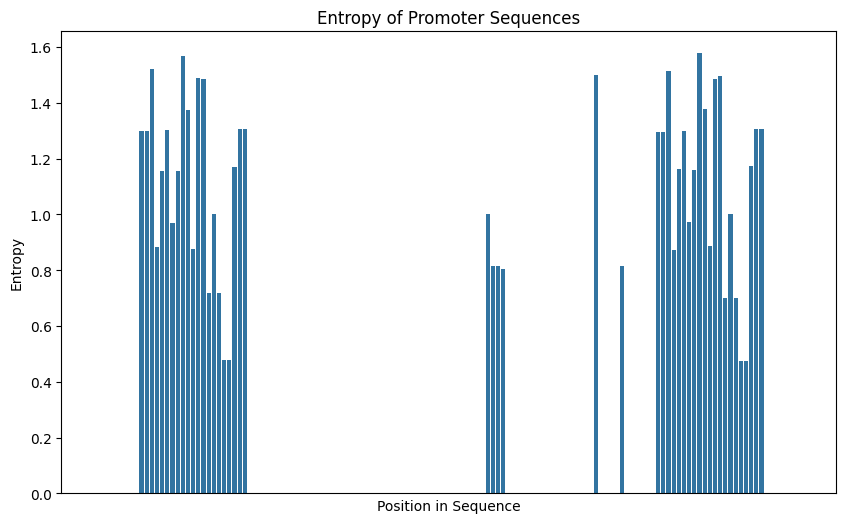

In [211]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(index_entropy) + 1)), y=index_entropy)
plt.xlabel('Position in Sequence')
plt.xticks([])
plt.ylabel('Entropy')
plt.title('Entropy of Promoter Sequences')
plt.show()

In [212]:
seen_h35 = {}

for sequence in Yu_df['Promoter Sequence']:
    h35 = sequence[80:86]
    if h35 in seen_h35:
        seen_h35[h35] += 1
    else:
        seen_h35[h35] = 1
    
seen_h35

{'TTGCAA': 376, 'TTTACA': 373, 'TTTACC': 366, 'TTGACA': 378}

In [213]:
print(Yu_df['Promoter Sequence'][0][80:86])
print(Yu_df['Promoter Sequence'][0][103:109])

TTGCAA
TATAAA


In [214]:
Yu_df['upstream_of_h35'] = Yu_df['Promoter Sequence'].apply(lambda x: x[:80])
Yu_df['h35'] = Yu_df['Promoter Sequence'].apply(lambda x: x[80:86])
Yu_df['spacer'] = Yu_df['Promoter Sequence'].apply(lambda x: x[86:103])
Yu_df['h10'] = Yu_df['Promoter Sequence'].apply(lambda x: x[103:109])
Yu_df['downstream_of_h10'] = Yu_df['Promoter Sequence'].apply(lambda x: x[109:])
Yu_df['promoter'] = Yu_df['h35'] + Yu_df['spacer'] + Yu_df['h10'] + Yu_df['downstream_of_h10'].apply(lambda x: x[:6])

Yu_df = Yu_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Yu_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,ACAGGTTTCCCGACTGGTTGTTACTCAGTAACAACCGGAAAGCGAA...,TTGCAA,TTTATGCTTCCGGCTCG,TATAAA,GTGTGGAAATTGTAGCGAGTAACAACCACACACAGGAAACA,TTGCAATTTATGCTTCCGGCTCGTATAAAGTGTGG,-2.416325
1,ACAGGTTTCCCGACTAATTGCGTTGGCAACGCAATTGGAAAGCGAA...,TTTACA,TTTATGCTTCCGGCTCG,GATAAT,GTGTGGAATTGTTATCGGATAACAATTACACACAGGAAACA,TTTACATTTATGCTTCCGGCTCGGATAATGTGTGG,-1.693285
2,ACAGGTTTCCCGACTAAATTGTGAGCGCTCACAATTGGAAAGCGAA...,TTTACC,TTTATGCTTCCGGCTCG,TATAAT,GTGTGGAAATTGTGAGCGCTCACAATTACACACAGGAAACA,TTTACCTTTATGCTTCCGGCTCGTATAATGTGTGG,-1.428472
3,ACAGGTTTCCCGACTAAATTGTGAGCGCTCACAATTGGAAAGCGAA...,TTGACA,TTTATGCTTCCGGCTCG,TATAAT,GTGTGGGGCAGTGAGCGGCTCACTGCCACACACAGGAAACA,TTGACATTTATGCTTCCGGCTCGTATAATGTGTGG,-4.289861
4,ACAGGTTTCCCGACTGGCAGTGAGCGCAACGCAATTGGAAAGCGAA...,TTTACC,TTTATGCTTCCGGCTCG,AATAAT,GTGTGGAATTGCGTTGGCAACGCAATTACACACAGGAAACA,TTTACCTTTATGCTTCCGGCTCGAATAATGTGTGG,-2.066208


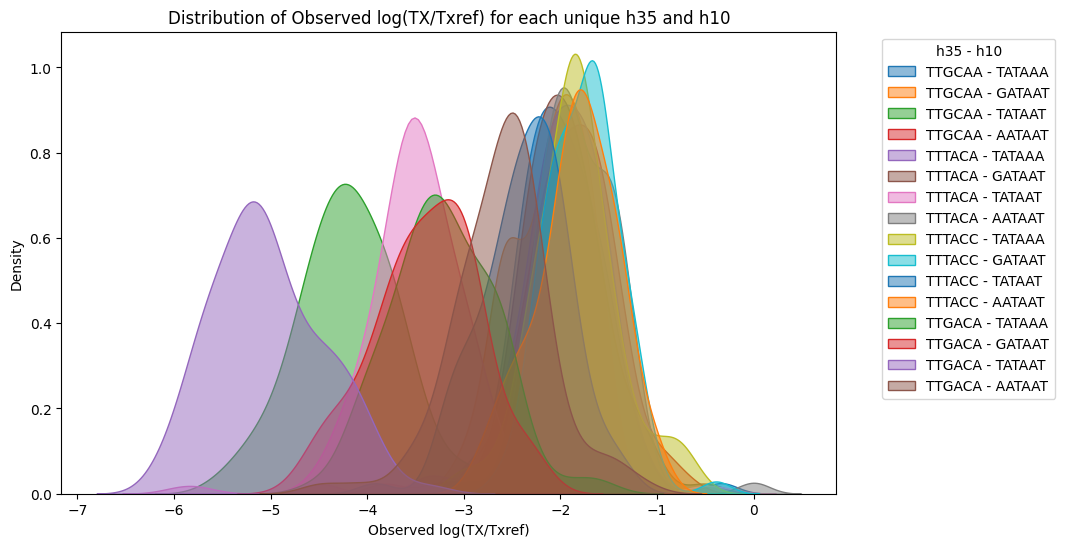

In [215]:
# plot the distrisbution of the lengths of the Observed log(TX/Txref) for each unique h35

unique_h35 = Yu_df['h35'].unique()
unique_h10 = Yu_df['h10'].unique()

plt.figure(figsize=(10, 6))
for h35 in unique_h35:
    for h10 in unique_h10:
        subset = Yu_df[(Yu_df['h35'] == h35) & (Yu_df['h10'] == h10)]
        sns.kdeplot(subset['Observed log(TX/Txref)'], label=f'{h35} - {h10}', fill=True, alpha=0.5)
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Density')
plt.title('Distribution of Observed log(TX/Txref) for each unique h35 and h10')
plt.legend(title='h35 - h10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [216]:
Yu_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/4 Yu.csv', index=False)

### Lagator 36N
---

In [24]:
Lagator_36N_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Lagator 36N')
Lagator_36N_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/5 Lagator 36N.csv', index=False)
Lagator_36N_df.head()

,ID,Promoter,Normalized Transcription Rates [TX/TXref],Observed log(TX/Txref),Predicted log(TX/Txref)
0,0,acctcgagcacgaggccaggcttcaaatctcaatgctattaggcta...,412.861164,-6.023111,-2.025180
1,1,acctcgagcacgaggccaggcttcaaatctcaatgctatttccccg...,431.764763,-6.067881,-2.982442
2,2,acctcgagcacgaggccaggcttcaaatctcaatgctatttaacgg...,38.699082,-3.655816,-1.743310
3,3,acctcgagcacgaggccaggcttcaaatctcaatgctattgttcag...,494.828246,-6.204211,-2.697641
4,4,acctcgagcacgaggccaggcttcaaatctcaatgctattgtcttg...,430.915994,-6.065913,-3.351861


In [25]:
Lagator_36N_df['Promoter Sequence'] = Lagator_36N_df['Promoter'].apply(lambda x: x.upper())

In [26]:
import numpy as np

def entropy(df):
    df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())

    # Pad the sequences if necessary
    max_length = max(df['Promoter Sequence'].apply(lambda x: len(x)))
    if len(df['Promoter Sequence'].apply(lambda x: len(x)).unique()) > 1:
        df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.zfill(max_length))

    entropies = []
    for index in range(max_length):
        frequency = {'A': 0, 'C': 0, 'G': 0, 'T': 0, '0': 0}
        for sequence in df['Promoter Sequence']:
            frequency[sequence[index]] += 1
        total_count = sum(frequency.values())
        probabilities = [freq / total_count for freq in frequency.values() if freq > 0]
        entropy = -sum(p * np.log2(p) for p in probabilities)
        entropies.append(entropy)

    entropy = sum(entropies)

    return entropies

index_entropy = entropy(Lagator_36N_df)

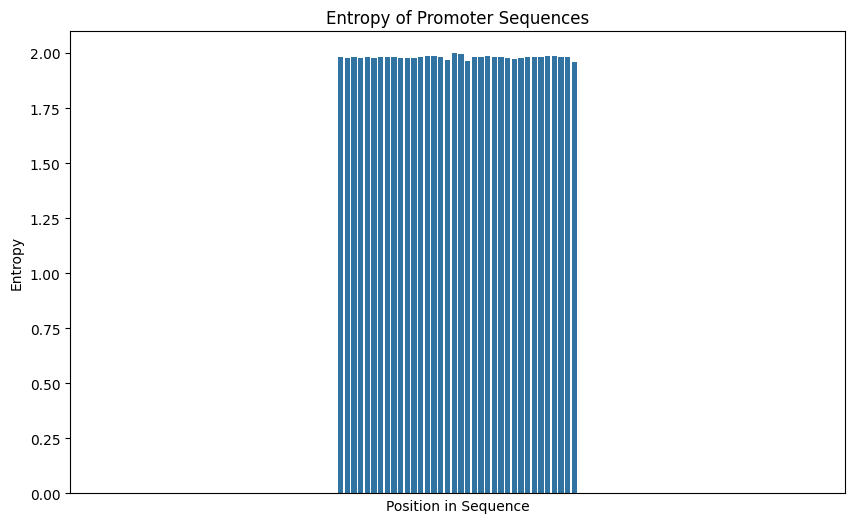

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(index_entropy) + 1)), y=index_entropy)
plt.xlabel('Position in Sequence')
plt.xticks([])
plt.ylabel('Entropy')
plt.title('Entropy of Promoter Sequences')
plt.show()

In [28]:
print([(idx, index_entropy) for idx, index_entropy in enumerate(index_entropy)])

[(0, -0.0), (1, -0.0), (2, -0.0), (3, -0.0), (4, -0.0), (5, -0.0), (6, -0.0), (7, -0.0), (8, -0.0), (9, -0.0), (10, -0.0), (11, -0.0), (12, -0.0), (13, -0.0), (14, -0.0), (15, -0.0), (16, -0.0), (17, -0.0), (18, -0.0), (19, -0.0), (20, -0.0), (21, -0.0), (22, -0.0), (23, -0.0), (24, -0.0), (25, -0.0), (26, -0.0), (27, -0.0), (28, -0.0), (29, -0.0), (30, -0.0), (31, -0.0), (32, -0.0), (33, -0.0), (34, -0.0), (35, -0.0), (36, -0.0), (37, -0.0), (38, -0.0), (39, -0.0), (40, 1.9811048641546254), (41, 1.9777789270279467), (42, 1.98046942572658), (43, 1.9788906524489585), (44, 1.9824478174136166), (45, 1.9777153063629653), (46, 1.9805007655373816), (47, 1.9824746101882045), (48, 1.9830625651223075), (49, 1.9769388385496625), (50, 1.979748469674556), (51, 1.9791030662962006), (52, 1.9834606204212266), (53, 1.9845346539228228), (54, 1.9852707246710026), (55, 1.982725983162281), (56, 1.9674622958479322), (57, 1.998383249835032), (58, 1.9970229049845285), (59, 1.9634030694591142), (60, 1.9803662

In [29]:
Lagator_36N_df['upstream_of_h35'] = Lagator_36N_df['Promoter Sequence'].apply(lambda x: x[:40])
Lagator_36N_df['h35'] = Lagator_36N_df['Promoter Sequence'].apply(lambda x: x[40:46])
Lagator_36N_df['spacer'] = Lagator_36N_df['Promoter Sequence'].apply(lambda x: x[46:63])
Lagator_36N_df['h10'] = Lagator_36N_df['Promoter Sequence'].apply(lambda x: x[63:69])
Lagator_36N_df['downstream_of_h10'] = Lagator_36N_df['Promoter Sequence'].apply(lambda x: x[69:])

Lagator_36N_df['promoter'] = Lagator_36N_df['h35'] + Lagator_36N_df['spacer'] + Lagator_36N_df['h10'] + Lagator_36N_df['downstream_of_h10'].apply(lambda x: x[:6])

Lagator_36N_df = Lagator_36N_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Lagator_36N_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,ACCTCGAGCACGAGGCCAGGCTTCAAATCTCAATGCTATT,AGGCTA,TCATGTCGACAAAACAT,TCATCG,TGTGTGGTGTGCATACAGATTGAGTAATGGCATCGAAACGGATCCTC,AGGCTATCATGTCGACAAAACATTCATCGTGTGTG,-6.023111
1,ACCTCGAGCACGAGGCCAGGCTTCAAATCTCAATGCTATT,TCCCCG,ATAACTTGCTATAGTCA,TATCAC,AATCCGTTGTGCATACAGATTGAGTAATGGCATCGAAACGGATCCTC,TCCCCGATAACTTGCTATAGTCATATCACAATCCG,-6.067881
2,ACCTCGAGCACGAGGCCAGGCTTCAAATCTCAATGCTATT,TAACGG,AACGCTGTCTGAAGGAT,GAGTGT,GAGGGAGTGTGCATACAGATTGAGTAATGGCATCGAAACGGATCCTC,TAACGGAACGCTGTCTGAAGGATGAGTGTGAGGGA,-3.655816
3,ACCTCGAGCACGAGGCCAGGCTTCAAATCTCAATGCTATT,GTTCAG,TCTAGACTAGCCCTTCG,TCTAGT,GGTACTGTGTGCATACAGATTGAGTAATGGCATCGAAACGGATCCTC,GTTCAGTCTAGACTAGCCCTTCGTCTAGTGGTACT,-6.204211
4,ACCTCGAGCACGAGGCCAGGCTTCAAATCTCAATGCTATT,GTCTTG,ACAATCTAATGTCCTGA,TATACC,CTGACATTGTGCATACAGATTGAGTAATGGCATCGAAACGGATCCTC,GTCTTGACAATCTAATGTCCTGATATACCCTGACA,-6.065913


In [30]:
Lagator_36N_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/5 Lagator 36N.csv', index=False)

### Lagator Pl
---

In [218]:
Lagator_Pl_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Lagator Pl')
Lagator_Pl_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/6 Lagator Pl.csv', index=False)
Lagator_Pl_df.head()

,ID,Promoter,Normalized Transcription Rates [TX/TXref],Observed log(TX/Txref),Predicted log(TX/Txref)
0,0,gcgcccgctgatcctcctcgaggataaatatatatttctggcggtc...,106.808588,-4.671038,-2.662932
1,1,gcgcccgctgatcctcctcgagggtaaataattacctctggcgttg...,196.482611,-5.280574,-2.624512
2,2,gcgcccgctgatcctcctcgaggataaatatttttctatggcggtg...,214.327765,-5.367506,-2.893890
3,3,gcgcccgctgatcctcctcgaggataaccatttatctctggcgatg...,210.133992,-5.347745,-2.801847
4,4,gcgcccgctgatcctcctcgagggtgaatatttatctctggcggtg...,99.378516,-4.598936,-2.471135


In [219]:
Lagator_Pl_df['Promoter Sequence'] = Lagator_Pl_df['Promoter'].apply(lambda x: x.upper())

In [221]:
import numpy as np

def entropy(df):
    df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())

    # Pad the sequences if necessary
    max_length = max(df['Promoter Sequence'].apply(lambda x: len(x)))
    if len(df['Promoter Sequence'].apply(lambda x: len(x)).unique()) > 1:
        df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.zfill(max_length))

    entropies = []
    for index in range(max_length):
        frequency = {'A': 0, 'C': 0, 'G': 0, 'T': 0, '0': 0}
        for sequence in df['Promoter Sequence']:
            frequency[sequence[index]] += 1
        total_count = sum(frequency.values())
        probabilities = [freq / total_count for freq in frequency.values() if freq > 0]
        entropy = -sum(p * np.log2(p) for p in probabilities)
        entropies.append(entropy)

    entropy = sum(entropies)

    return entropies

index_entropy = entropy(Lagator_Pl_df)

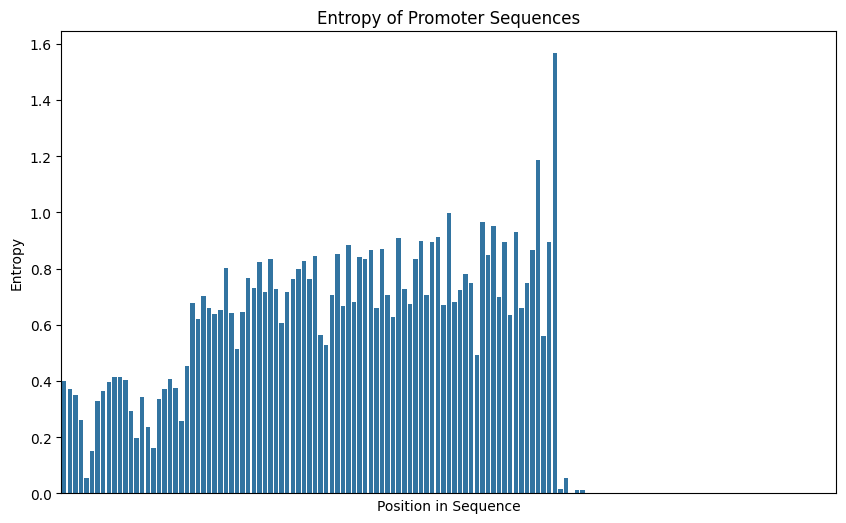

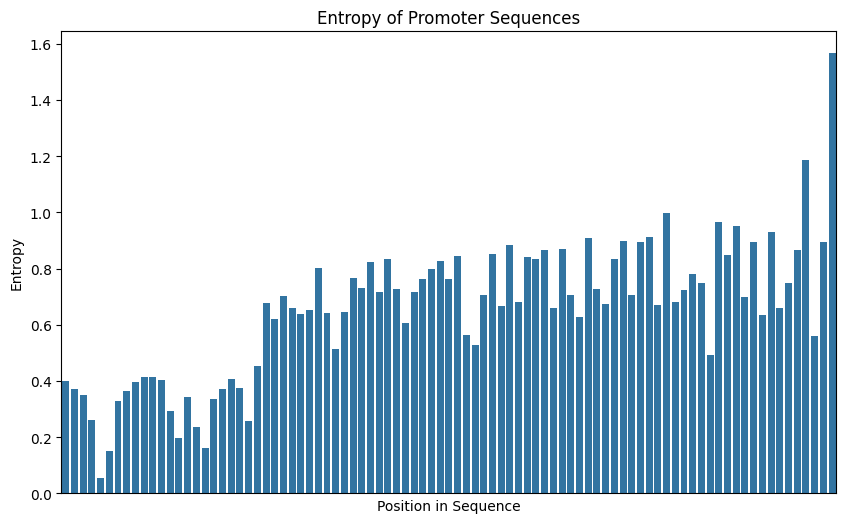

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(index_entropy) + 1)), y=index_entropy)
plt.xlabel('Position in Sequence')
plt.xticks([])
plt.ylabel('Entropy')
plt.title('Entropy of Promoter Sequences')
plt.show()

data = index_entropy[:89]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(data) + 1)), y=data)
plt.xlabel('Position in Sequence')
plt.xticks([])
plt.ylabel('Entropy')
plt.title('Entropy of Promoter Sequences')
plt.show()

In [226]:
def get_most_common_nucleotide_at_each_position(df):
    max_length = df['Promoter Sequence'].apply(len).max()
    most_common_nucleotides = []

    for i in range(max_length):
        nucleotides_at_position = df['Promoter Sequence'].apply(lambda x: x[i] if i < len(x) else None)
        counts = nucleotides_at_position.value_counts()
        most_common_nucleotide = counts.idxmax()
        most_common_nucleotides.append(most_common_nucleotide)

    return ''.join(most_common_nucleotides)

most_common_nucleotides = get_most_common_nucleotide_at_each_position(Lagator_Pl_df)

print(most_common_nucleotides)

GCGCCCGCTGATCCTCCTCGAGGATAAATATTTATCTCTGGCGGTGTTGACATAAATACCACTGGCGGTGATACTGAGCACATCAGCAGGAATTCATTAAAGAGGAGAAAGGTACCATGAGTAAAGGAGAAGAACTTTT


In [ ]:
# For both Pl and Pr, we defined the -35 and -10 as 28bp upstearm of the RBS (AGGAG)
# in the non-mutated sequence, then we used those indexes for all other sequences

print(most_common_nucleotides)
print((' ' * 46) + most_common_nucleotides[46:52] + (' ' * 17) + most_common_nucleotides[69:75])

GCGCCCGCTGATCCTCCTCGAGGATAAATATTTATCTCTGGCGGTGTTGACATAAATACCACTGGCGGTGATACTGAGCACATCAGCAGGAATTCATTAAAGAGGAGAAAGGTACCATGAGTAAAGGAGAAGAACTTTT
                                              TTGACA                 GATACT


In [229]:
Lagator_Pl_df['upstream_of_h35'] = Lagator_Pl_df['Promoter Sequence'].apply(lambda x: x[:46])
Lagator_Pl_df['h35'] = Lagator_Pl_df['Promoter Sequence'].apply(lambda x: x[46:52])
Lagator_Pl_df['spacer'] = Lagator_Pl_df['Promoter Sequence'].apply(lambda x: x[52:69])
Lagator_Pl_df['h10'] = Lagator_Pl_df['Promoter Sequence'].apply(lambda x: x[69:75])
Lagator_Pl_df['downstream_of_h10'] = Lagator_Pl_df['Promoter Sequence'].apply(lambda x: x[75:])

Lagator_Pl_df['promoter'] = Lagator_Pl_df['h35'] + Lagator_Pl_df['spacer'] + Lagator_Pl_df['h10'] + Lagator_Pl_df['downstream_of_h10'].apply(lambda x: x[:6])
Lagator_Pl_df
Lagator_Pl_df = Lagator_Pl_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Lagator_Pl_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,GCGCCCGCTGATCCTCCTCGAGGATAAATATATATTTCTGGCGGTC,TTGACA,TCAATACCACTGGCACT,GAAACT,CAGCACATCATCATGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGACATCAATACCACTGGCACTGAAACTCAGCAC,-4.671038
1,GCGCCCGCTGATCCTCCTCGAGGGTAAATAATTACCTCTGGCGTTG,TTGACC,TACATGCCACTAATGGT,GATACT,GACCCCATCAGTAGGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGACCTACATGCCACTAATGGTGATACTGACCCC,-5.280574
2,GCGCCCGCTGATCCTCCTCGAGGATAAATATTTTTCTATGGCGGTG,TTGACA,TATGTACCACTGACGTT,GACACT,GAGCACATCAGCAGGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGACATATGTACCACTGACGTTGACACTGAGCAC,-5.367506
3,GCGCCCGCTGATCCTCCTCGAGGATAACCATTTATCTCTGGCGATG,TTGACA,TATATGCCACTGGCCGT,CATATT,GAGCAAATCAGCCGGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGACATATATGCCACTGGCCGTCATATTGAGCAA,-5.347745
4,GCGCCCGCTGATCCTCCTCGAGGGTGAATATTTATCTCTGGCGGTG,TTGTCA,GAAGTACCACTGGCGGA,GATACT,GAGCACATCATCAGGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGTCAGAAGTACCACTGGCGGAGATACTGAGCAC,-4.598936


In [230]:
Lagator_Pl_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/6 Lagator Pl.csv', index=False)

### Lagator Pr
---

In [231]:
Lagator_Pr_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Lagator Pr')
Lagator_Pr_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/7 Lagator Pl.csv', index=False)
Lagator_Pr_df.head()

,ID,Promoter,Normalized Transcription Rates [TX/TXref],Observed log(TX/Txref),Predicted log(TX/Txref)
0,0,gcgcccgctgatcctcctcgaggataaatatctaacaccgtgcgtg...,460.937052,-6.133261,-3.068614
1,1,gcgcccgctgatcctcctcgaggattaatatataacactgtgcgtg...,437.165582,-6.080312,-3.031809
2,2,agcgcccgctgatcctcctcgaggataaagatcgaccaccgtgcgt...,329.750367,-5.798336,-2.951837
3,3,gcgcccgctgatcctcctcgaggtaaaatatctgacatcgtgcgtg...,167.526728,-5.121143,-2.708042
4,4,gcgcccgctgatcctcctcgaggataaatatctaacaccgtgcgag...,316.933484,-5.758692,-2.562494


In [232]:
Lagator_Pr_df['Promoter Sequence'] = Lagator_Pr_df['Promoter'].apply(lambda x: x.upper())

In [233]:
import numpy as np

def entropy(df):
    df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())

    # Pad the sequences if necessary
    max_length = max(df['Promoter Sequence'].apply(lambda x: len(x)))
    if len(df['Promoter Sequence'].apply(lambda x: len(x)).unique()) > 1:
        df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.zfill(max_length))

    entropies = []
    for index in range(max_length):
        frequency = {'A': 0, 'C': 0, 'G': 0, 'T': 0, '0': 0}
        for sequence in df['Promoter Sequence']:
            frequency[sequence[index]] += 1
        total_count = sum(frequency.values())
        probabilities = [freq / total_count for freq in frequency.values() if freq > 0]
        entropy = -sum(p * np.log2(p) for p in probabilities)
        entropies.append(entropy)

    entropy = sum(entropies)

    return entropies

index_entropy = entropy(Lagator_Pr_df)

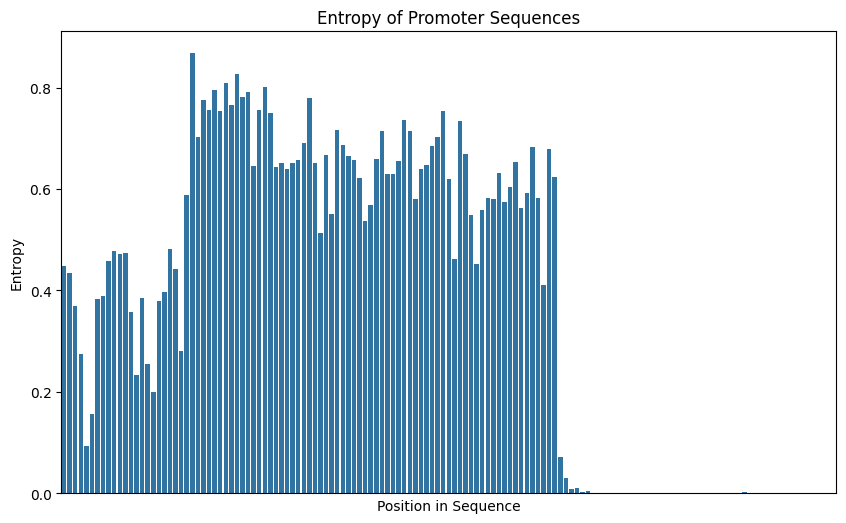

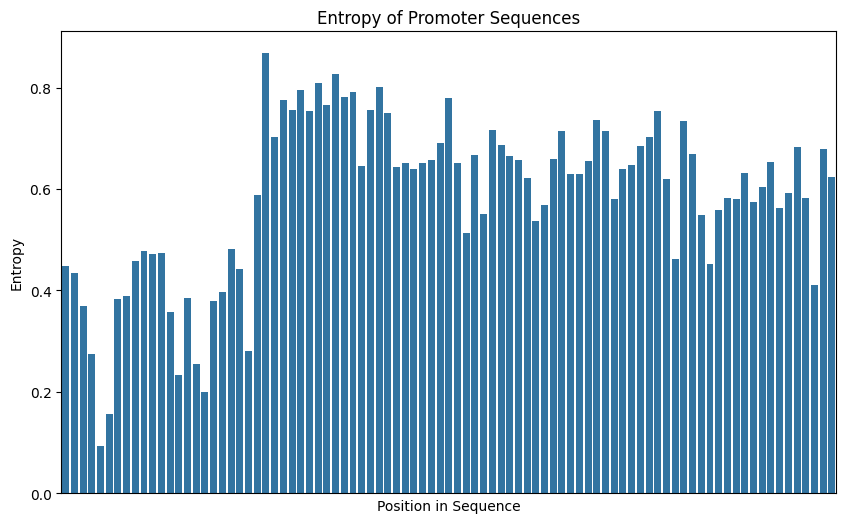

In [234]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(index_entropy) + 1)), y=index_entropy)
plt.xlabel('Position in Sequence')
plt.xticks([])
plt.ylabel('Entropy')
plt.title('Entropy of Promoter Sequences')
plt.show()

data = index_entropy[:89]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(data) + 1)), y=data)
plt.xlabel('Position in Sequence')
plt.xticks([])
plt.ylabel('Entropy')
plt.title('Entropy of Promoter Sequences')
plt.show()

In [235]:
def get_most_common_nucleotide_at_each_position(df):
    max_length = df['Promoter Sequence'].apply(len).max()
    most_common_nucleotides = []

    for i in range(max_length):
        nucleotides_at_position = df['Promoter Sequence'].apply(lambda x: x[i] if i < len(x) else None)
        counts = nucleotides_at_position.value_counts()
        most_common_nucleotide = counts.idxmax()
        most_common_nucleotides.append(most_common_nucleotide)

    return ''.join(most_common_nucleotides)

most_common_nucleotides = get_most_common_nucleotide_at_each_position(Lagator_Pr_df)

print(most_common_nucleotides)

GCGCCCGCTGATCCTCCTCGAGGATAAATATCTAACACCGTGCGTGTTGACTATTTTACCTCTGGCGGTGATAATGGTTGCATGTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAGTAAAGGAGAAGAACTTTT


In [ ]:
# For both Pl and Pr, we defined the -35 and -10 as 28bp upstearm of the RBS (AGGAG)
# in the non-mutated sequence, then we used those indexes for all other sequences

print(most_common_nucleotides)
print((' ' * 46) + most_common_nucleotides[46:52] + (' ' * 17) + most_common_nucleotides[69:75])

GCGCCCGCTGATCCTCCTCGAGGATAAATATCTAACACCGTGCGTGTTGACTATTTTACCTCTGGCGGTGATAATGGTTGCATGTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAGTAAAGGAGAAGAACTTTT
                                              TTGACT                 GATAAT


In [237]:
Lagator_Pr_df['upstream_of_h35'] = Lagator_Pr_df['Promoter Sequence'].apply(lambda x: x[:46])
Lagator_Pr_df['h35'] = Lagator_Pr_df['Promoter Sequence'].apply(lambda x: x[46:52])
Lagator_Pr_df['spacer'] = Lagator_Pr_df['Promoter Sequence'].apply(lambda x: x[52:69])
Lagator_Pr_df['h10'] = Lagator_Pr_df['Promoter Sequence'].apply(lambda x: x[69:75])
Lagator_Pr_df['downstream_of_h10'] = Lagator_Pr_df['Promoter Sequence'].apply(lambda x: x[75:])

Lagator_Pr_df['promoter'] = Lagator_Pr_df['h35'] + Lagator_Pr_df['spacer'] + Lagator_Pr_df['h10'] + Lagator_Pr_df['downstream_of_h10'].apply(lambda x: x[:6])

Lagator_Pr_df = Lagator_Pr_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Lagator_Pr_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,GCGCCCGCTGATCCTCCTCGAGGATAAATATCTAACACCGTGCGTG,TTGACT,ATTTTACCTCTGGCGGT,GATAAT,GGTTGCATGTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGACTATTTTACCTCTGGCGGTGATAATGGTTGC,-6.133261
1,GCGCCCGCTGATCCTCCTCGAGGATTAATATATAACACTGTGCGTG,TTGACT,ATTTTCCCTCTGGCCGT,GATAAT,GATTGCATTTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGACTATTTTCCCTCTGGCCGTGATAATGATTGC,-6.080312
2,AGCGCCCGCTGATCCTCCTCGAGGATAAAGATCGACCACCGTGCGT,GTTGAC,TTGTTTACCTCTGCGGT,GATAAT,GGTTGCGTGTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,GTTGACTTGTTTACCTCTGCGGTGATAATGGTTGC,-5.798336
3,GCGCCCGCTGATCCTCCTCGAGGTAAAATATCTGACATCGTGCGTG,TTGCCT,ATTTCACCTCTGGCGGT,GACAAT,GGTTGCATGTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TTGCCTATTTCACCTCTGGCGGTGACAATGGTTGC,-5.121143
4,GCGCCCGCTGATCCTCCTCGAGGATAAATATCTAACACCGTGCGAG,TAGACT,TTTTTACCTGCGGCGGT,GATAAT,GGTTGCAGGTACTAGAATTCATTAAAGAGGAGAAAGGTACCATGAG...,TAGACTTTTTTACCTGCGGCGGTGATAATGGTTGC,-5.758692


In [238]:
Lagator_Pr_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/7 Lagator Pr.csv', index=False)

### Anderson Series
---

In [239]:
Anderson_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='Anderson Series (Fig 4c)')
Anderson_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/8 Anderson Series.csv', index=False)
Anderson_df.head()

,ID,Upstream DNA,Promoter Sequence,Downstream DNA,Observed Fluorescence [au],Observed log(TX/Txref),Predicted log(TX/Txref)
0,0,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,CTGATAGCTAGCTCAGTCCTAGGGATTATGCTAGC,TACTAGTGAAAGAGGAGAAATACTAGATG,17.0,-2.833213,-2.150917
1,1,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,CTGATGGCTAGCTCAGTCCTAGGGATTATGCTAGC,TACTAGTGAAAGAGGAGAAATACTAGATG,21.0,-3.044522,-2.214439
2,2,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,TTTACAGCTAGCTCAGTCCTAGGGACTGTGCTAGC,TACTAGTGAAAGAGGAGAAATACTAGATG,106.0,-4.663439,-2.284415
3,3,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,TTGACAGCTAGCTCAGTCCTAGGGATTGTGCTAGC,TACTAGTGAAAGAGGAGAAATACTAGATG,162.0,-5.087596,-2.769605
4,4,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,TTTATGGCTAGCTCAGTCCTAGGTACAATGCTAGC,TACTAGTGAAAGAGGAGAAATACTAGATG,256.0,-5.545177,-2.743794


In [240]:
# Anderson Series has a Data Source and 3 NaN rows at the end
Anderson_df = Anderson_df.iloc[:18, :]

In [241]:
Anderson_df['upstream_of_h35'] = Anderson_df['Upstream DNA']
Anderson_df['h35'] = Anderson_df['Promoter Sequence'].apply(lambda x: x[0:6])
Anderson_df['spacer'] = Anderson_df['Promoter Sequence'].apply(lambda x: x[6:23])
Anderson_df['h10'] = Anderson_df['Promoter Sequence'].apply(lambda x: x[23:29])
Anderson_df['downstream_of_h10'] = Anderson_df['Promoter Sequence'].apply(lambda x: x[29:]) + Anderson_df['Downstream DNA']

Anderson_df['promoter'] = Anderson_df['h35'] + Anderson_df['spacer'] + Anderson_df['h10'] + Anderson_df['downstream_of_h10'].apply(lambda x: x[:6])

Anderson_df = Anderson_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]
Anderson_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,CTGATA,GCTAGCTCAGTCCTAGG,GATTAT,GCTAGCTACTAGTGAAAGAGGAGAAATACTAGATG,CTGATAGCTAGCTCAGTCCTAGGGATTATGCTAGC,-2.833213
1,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,CTGATG,GCTAGCTCAGTCCTAGG,GATTAT,GCTAGCTACTAGTGAAAGAGGAGAAATACTAGATG,CTGATGGCTAGCTCAGTCCTAGGGATTATGCTAGC,-3.044522
2,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,TTTACA,GCTAGCTCAGTCCTAGG,GACTGT,GCTAGCTACTAGTGAAAGAGGAGAAATACTAGATG,TTTACAGCTAGCTCAGTCCTAGGGACTGTGCTAGC,-4.663439
3,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,TTGACA,GCTAGCTCAGTCCTAGG,GATTGT,GCTAGCTACTAGTGAAAGAGGAGAAATACTAGATG,TTGACAGCTAGCTCAGTCCTAGGGATTGTGCTAGC,-5.087596
4,TTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGG...,TTTATG,GCTAGCTCAGTCCTAGG,TACAAT,GCTAGCTACTAGTGAAAGAGGAGAAATACTAGATG,TTTATGGCTAGCTCAGTCCTAGGTACAATGCTAGC,-5.545177


In [242]:
Anderson_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/8 Anderson Series.csv', index=False)

### De Novo Designs
---

In [277]:
De_Novo_df = pd.read_excel('Data/LaFleur Supp Data Seperated/LaFleur Supp 1.xlsx', sheet_name='De Novo Designs (Fig 5 b and c)')
De_Novo_df.to_csv('Data/LaFleur Supp Data Seperated/Unprocessed/9 De Novo Designs.csv', index=False)
De_Novo_df.head()

,ID,Upstream DNA,Promoter Sequence,Downstream DNA,Observed Fluorescence [au],Stddev Fluorescence [au],Predicted log(TX/Txref),Observed log(TX/Txref)
0,1,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCCTCGGTCTTTTTTATCTACGTTGACACTATTACCTATTAC...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,9.172413,0.359914,-3.541709,-2.562449
1,2,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCGGGCGTGTCACAGTTGGCAAATTATCAATATACGTAGTTT...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,3.247227,0.256830,-2.408568,-1.524050
2,3,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCATTAATCATGCATTGAAATATCGCACACAGTTTATGGTAA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,24.756630,0.692196,-2.677980,-3.555342
3,4,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCTCCCTCCCCAGGATGGAACAATTTGACAATCGGGGGGTGC...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,229.264389,1.923310,-3.683241,-5.781125
4,5,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCTGCTCCGTCGTGTGTGTGCTCGACGCACGCGTGGGGGTGG...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,0.707336,2.197614,-2.010349,0.000000


In [278]:
# De Novo Designs has two "Notes" and an NaN row at the end
De_Novo_df = De_Novo_df.iloc[:35, :]

In [55]:
# problem_indices = []

# def best_match(seq, motif):
#     return sum(1 for a, b in zip(seq, motif) if a == b)

# for idx, row in De_Novo_df.iterrows():

#     promoter = row['Promoter Sequence']

#     h35_idxes = [i for i in range(len(promoter)) if promoter.startswith('TTGACA', i)]
#     h10_idxes = [i for i in range(len(promoter)) if promoter.startswith('TATAAT', i)]

#     # if we have either h35 or h10, we can try to find most similar one based on a spacer of 16, 17, or 18
#     if len(h35_idxes) == 1 and len(h10_idxes) == 0:
#         candidates = []
#         for spacer_length in [16, 17, 18]:
#             start = h35_idxes[0] + 6 + spacer_length
#             if start + 6 <= len(promoter):
#                 seq = promoter[start:start+6]
#                 score = best_match(seq, 'TATAAT')
#                 candidates.append((score, start))
#         if candidates:
#             best_score, best_start = max(candidates)
#             # if best_score >= 4:
#             h10_idxes = [best_start]

#     elif len(h10_idxes) == 1 and len(h35_idxes) == 0:
#         candidates = []
#         for spacer_length in [16, 17, 18]:
#             start = h10_idxes[0] - spacer_length - 6
#             if start >= 0:
#                 seq = promoter[start:start+6]
#                 score = best_match(seq, 'TTGACA')
#                 candidates.append((score, start))
#         if candidates:
#             best_score, best_start = max(candidates)
#             # if best_score >= 4:
#             h35_idxes = [best_start]

#     # skip if there are no h35 or h10
#     if len(h35_idxes) == 0 or len(h10_idxes) == 0:
#         problem_indices.append(idx)
#         continue

#     # skip if there are multiple h35 or h10
#     if len(h35_idxes) > 1 or len(h10_idxes) > 1:
#         problem_indices.append(idx)
#         continue
    
#     # skip if h10 is before h35
#     if h35_idxes[0] > h10_idxes[0]:
#         problem_indices.append(idx)
#         continue

#     h35_idx = h35_idxes[0]
#     h10_idx = h10_idxes[0]

#     upstream_of_h35 = promoter[:h35_idx]
#     h35 = promoter[h35_idx:h35_idx + 6]
#     spacer = promoter[h35_idx + 6:h10_idx]
#     h10 = promoter[h10_idx:h10_idx + 6]
#     downstream_of_h10 = promoter[h10_idx + 6:]
    
#     De_Novo_df.at[idx, 'upstream_of_h35'] = upstream_of_h35
#     De_Novo_df.at[idx, 'h35'] = h35
#     De_Novo_df.at[idx, 'spacer'] = spacer
#     De_Novo_df.at[idx, 'h10'] = h10
#     De_Novo_df.at[idx, 'downstream_of_h10'] = downstream_of_h10

#     De_Novo_df.at[idx, 'promoter'] = h35 + spacer + h10 + downstream_of_h10[:6]

# De_Novo_df


In [279]:
def find_motifs(promoter_sequence):
    
    def score(seq, consensus):
        return sum(1 for a, b in zip(seq, consensus) if a == b)

    best_match = {'upstream_of_h35': '', 'h35': '', 'spacer': '', 'h10': '', 'downstream_of_h10': '', 'spacer_len': None, 'score': -1}
    
    seq = promoter_sequence.upper()
    n = len(seq)

    for i in range(n - 6):  # sliding window for h35 candidate
        h35_candidate = seq[i:i+6]

        # Possible spacer lengths are 16, 17, or 18 nucleotides
        for spacer_len in [16, 17, 18]:
            h10_start = i + 6 + spacer_len
            h10_end = h10_start + 6

            if h10_end > n:
                continue  # skip if beyond sequence length

            h10_candidate = seq[h10_start:h10_end]

            h35_score = score(h35_candidate, 'TTGACA')
            h10_score = score(h10_candidate, 'TATAAT')

            total_score = h35_score + h10_score

            if total_score > best_match['score']:
                best_match = {
                    'upstream_of_h35': seq[:i],
                    'h35': h35_candidate,
                    'spacer': seq[i+6:h10_start],
                    'h10': h10_candidate,
                    'downstream_of_h10': seq[h10_end:],
                    'spacer_len': spacer_len,
                    'score': total_score,
                }

    return best_match


for i, promoter in enumerate(De_Novo_df['Promoter Sequence']):
    best_match = find_motifs(promoter)

    De_Novo_df.at[i, 'upstream_of_h35'] = best_match['upstream_of_h35']
    De_Novo_df.at[i, 'h35'] = best_match['h35']
    De_Novo_df.at[i, 'spacer'] = best_match['spacer']
    De_Novo_df.at[i, 'h10'] = best_match['h10']
    De_Novo_df.at[i, 'downstream_of_h10'] = best_match['downstream_of_h10']
    De_Novo_df.at[i, 'promoter'] = best_match['h35'] + best_match['spacer'] + best_match['h10'] + best_match['downstream_of_h10'][:6]

De_Novo_df = De_Novo_df[['upstream_of_h35', 'h35', 'spacer', 'h10', 'downstream_of_h10', 'promoter', 'Observed log(TX/Txref)']]

De_Novo_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref)
0,GGATCCCTCGGTCTTTTTTATCTACG,TTGACA,CTATTACCTATTACTC,TAGTAT,TGCGCTTAGTCTAGCATAGTATTTACGTTGAATTC,TTGACACTATTACCTATTACTCTAGTATTGCGCT,-2.562449
1,GGATCCGGGC,GTGTCA,CAGTTGGCAAATTATCAA,TATACG,TAGTTTATAATTGCTTATAATGTGGTCTGCAGGATTGTACACAGAATTC,GTGTCACAGTTGGCAAATTATCAATATACGTAGTTT,-1.524050
2,GGATCCATTAATCATGCA,TTGAAA,TATCGCACACAGTTTAT,GGTAAA,ATTCCCTGCAAAGGCGTGGACACGAGCCAGGGGTTTGAATTC,TTGAAATATCGCACACAGTTTATGGTAAAATTCCC,-3.555342
3,GGATCCTCCCTCCCCAGGATGGAACAAT,TTGACA,ATCGGGGGGTGCATAAT,TAAACT,TCGCGCTAAGGGGCGATGAAGTGCGGGAATTC,TTGACAATCGGGGGGTGCATAATTAAACTTCGCGC,-5.781125
4,GGATCCTGCTCCGTCGTGTGTGTGC,TCGACG,CACGCGTGGGGGTGGT,GACACT,TTCTCTCTCCCCACGTCCGCGTTTTGATCTGAATTC,TCGACGCACGCGTGGGGGTGGTGACACTTTCTCT,0.000000


In [280]:
print(De_Novo_df['spacer'].apply(lambda x: len(x)).value_counts().sort_index())
print()
print(De_Novo_df['promoter'].apply(lambda x: len(x)).value_counts().sort_index())

spacer
16     6
17    21
18     8
Name: count, dtype: int64

promoter
32     1
34     6
35    21
36     7
Name: count, dtype: int64


In [282]:
De_Novo_df = De_Novo_df[De_Novo_df['promoter'].apply(len) >= 34]
print(De_Novo_df['promoter'].apply(lambda x: len(x)).value_counts().sort_index())

promoter
34     6
35    21
36     7
Name: count, dtype: int64


In [283]:
De_Novo_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/9 De Novo Designs.csv', index=False)

### Handling data with repeats
---

In [15]:
LaFleur_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/1 LaFleur.csv')
Urtecho_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/2 Urtecho.csv')
Hossain_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/3 Hossain.csv')
Yu_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/4 Yu.csv')
Lagator_36N_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/5 Lagator 36N.csv')
Lagator_Pl_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/6 Lagator Pl.csv')
Lagator_Pr_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/7 Lagator Pr.csv')
Anderson_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/8 Anderson Series.csv')
De_Novo_df = pd.read_csv('Data/LaFleur Supp Data Seperated/Processed/9 De Novo Designs.csv')

dfs = [LaFleur_df, Urtecho_df, Hossain_df, Yu_df, Lagator_36N_df, Lagator_Pl_df, Lagator_Pr_df, Anderson_df, De_Novo_df]
df_names = ['LaFleur', 'Urtecho', 'Hossain', 'Yu', 'Lagator_36N', 'Lagator_Pl', 'Lagator_Pr', 'Anderson', 'De_Novo']


In [16]:
temp_LaFleur_df = LaFleur_df.copy()
temp_Urtecho_df = Urtecho_df.copy()
temp_Hossain_df = Hossain_df.copy()
temp_Yu_df = Yu_df.copy()
temp_Lagator_36N_df = Lagator_36N_df.copy()
temp_Lagator_Pl_df = Lagator_Pl_df.copy()
temp_Lagator_Pr_df = Lagator_Pr_df.copy()
temp_Anderson_df = Anderson_df.copy()
temp_De_Novo_df = De_Novo_df.copy()

temp_LaFleur_df['file_name'] = 'LaFleur'
temp_Urtecho_df['file_name'] = 'Urtecho'
temp_Hossain_df['file_name'] = 'Hossain'
temp_Yu_df['file_name'] = 'Yu'
temp_Lagator_36N_df['file_name'] = 'Lagator_36N'
temp_Lagator_Pl_df['file_name'] = 'Lagator_Pl'
temp_Lagator_Pr_df['file_name'] = 'Lagator_Pr'
temp_Anderson_df['file_name'] = 'Anderson'
temp_De_Novo_df['file_name'] = 'De_Novo'

combined_df = pd.concat([temp_LaFleur_df, temp_Urtecho_df, temp_Hossain_df, temp_Yu_df, temp_Lagator_36N_df, temp_Lagator_Pl_df, temp_Lagator_Pr_df, temp_Anderson_df, temp_De_Novo_df], ignore_index=True)
combined_df.head()

,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref),file_name
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCCCCGC,-3.386326,LaFleur
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGCGGC,-3.503140,LaFleur
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGCGCC,-4.207206,LaFleur
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATGCGGCG,-3.392439,LaFleur
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGGGGG,-3.698903,LaFleur


In [5]:
print(combined_df['spacer'].apply(lambda x: len(x)).value_counts().sort_index())
print()
print(combined_df['promoter'].apply(lambda x: len(x)).value_counts().sort_index())

spacer
16      115
17    55444
18       78
Name: count, dtype: int64

promoter
34      115
35    55444
36       78
Name: count, dtype: int64


In [21]:
length = len(combined_df)

combined_df['Observed log(TX/Txref)'] = combined_df.groupby('promoter')['Observed log(TX/Txref)'].transform(lambda x: x.mode().iloc[0])
combined_df = combined_df.drop_duplicates(subset='promoter').reset_index(drop=True)

print(f"{length - len(combined_df)} duplicates removed")
print("length of combined_df:", len(combined_df))

12837 duplicates removed
length of combined_df: 42800


In [22]:
combined_df.isna().sum()

upstream_of_h35           0
h35                       0
spacer                    0
h10                       0
downstream_of_h10         0
promoter                  0
Observed log(TX/Txref)    0
file_name                 0
dtype: int64

In [23]:
for name in df_names:
    group = combined_df[combined_df['file_name'] == name]
    print(group['promoter'].apply(lambda x: len(x)).value_counts())
    print()

promoter
35    10806
34      109
36       71
Name: count, dtype: int64

promoter
35    3706
Name: count, dtype: int64

promoter
35    4350
Name: count, dtype: int64

promoter
35    16
Name: count, dtype: int64

promoter
35    11484
Name: count, dtype: int64

promoter
35    2562
Name: count, dtype: int64

promoter
35    9645
Name: count, dtype: int64

promoter
35    18
Name: count, dtype: int64

promoter
35    20
36     7
34     6
Name: count, dtype: int64



In [47]:
combined_df['promoter'].apply(lambda x: len(x)).value_counts()

promoter
35    42607
34      115
36       78
Name: count, dtype: int64

In [24]:
combined_df['file_name'].value_counts()

file_name
Lagator_36N    11484
LaFleur        10986
Lagator_Pr      9645
Hossain         4350
Urtecho         3706
Lagator_Pl      2562
De_Novo           33
Anderson          18
Yu                16
Name: count, dtype: int64

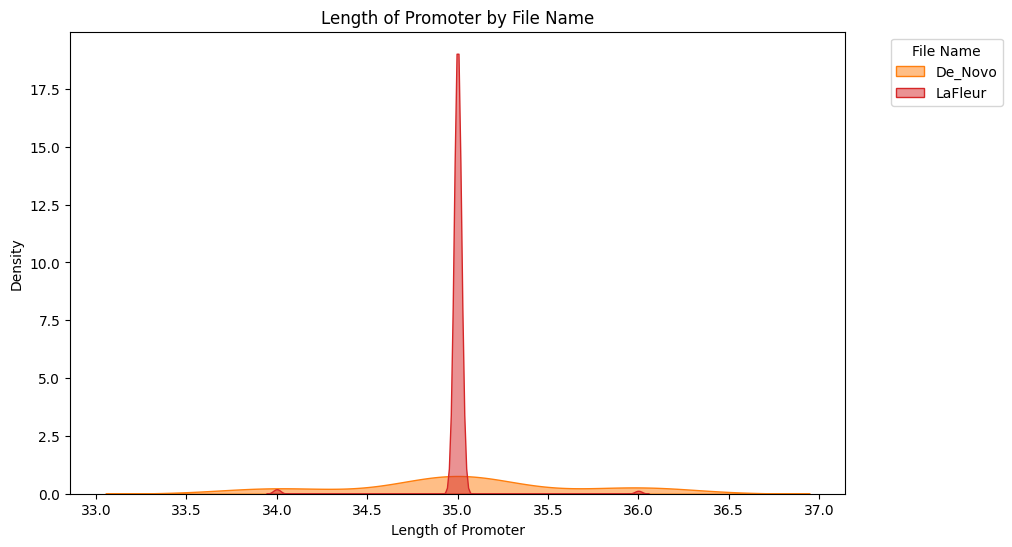

In [25]:
# plot different lengths of 'promoter' in the combined_df by file_name

plt.figure(figsize=(10, 6))
for name, group in combined_df.groupby('file_name'):
    sns.kdeplot(group['promoter'].apply(len), label=name, fill=True, alpha=0.5, warn_singular=False)
plt.xlabel('Length of Promoter')
plt.ylabel('Density')
plt.title('Length of Promoter by File Name')
plt.legend(title='File Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [48]:
# print all rows where a promoter has a character that is not A, C, G, T

for idx, row in combined_df.iterrows():
    promoter = row['promoter']
    if any(char not in 'ACGT' for char in promoter):
        print(f"Row {idx}: {row}")

In [37]:
from sklearn.preprocessing import MinMaxScaler

combined_df['Min-Max Observed log(TX/Txref)'] = MinMaxScaler().fit_transform(combined_df[['Observed log(TX/Txref)']].abs())
combined_df = combined_df[[
    'file_name',
    'upstream_of_h35',
    'h35',
    'spacer',
    'h10',
    'downstream_of_h10',
    'promoter',
    'Observed log(TX/Txref)',
    'Min-Max Observed log(TX/Txref)'
]]

combined_df.head()

,file_name,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref),Min-Max Observed log(TX/Txref)
0,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCCCCGC,-3.866615,0.283954
1,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGCGGC,-3.503140,0.257261
2,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGCGCC,-4.207206,0.308966
3,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATGCGGCG,-3.392439,0.249132
4,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATCGGGGG,-3.957181,0.290605


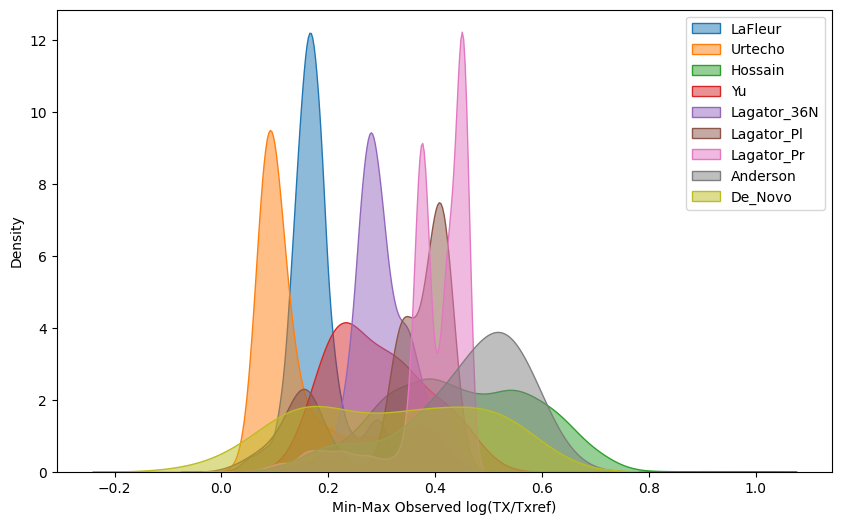

In [53]:
plt.figure(figsize=(10, 6))

for file_name in combined_df['file_name'].unique():
    subset = combined_df[combined_df['file_name'] == file_name]
    sns.kdeplot(subset['Min-Max Observed log(TX/Txref)'], label=file_name, fill=True, alpha=0.5, warn_singular=False)
    plt.xlabel('Min-Max Observed log(TX/Txref)')
    plt.ylabel('Density')
plt.legend()
plt.show()

In [38]:
combined_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/Combined.csv', index=False)

In [40]:
from sklearn.model_selection import train_test_split

train_list = []
test_list = []

for file in combined_df['file_name'].unique():
    file_df = combined_df[combined_df['file_name'] == file]
    train, test = train_test_split(file_df, test_size=0.2, random_state=42)
    train_list.append(train)
    test_list.append(test)

train_df = pd.concat(train_list, ignore_index=True)
test_df = pd.concat(test_list, ignore_index=True)


In [41]:
train_df.head()

,file_name,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref),Min-Max Observed log(TX/Txref)
0,LaFleur,TTTTCTATCTACGTAC,TGAGGA,CTATTTCCTATTTCTCT,TATAAT,TTGTGTTCTCTACCTTAGTTTGTACGTT,TGAGGACTATTTCCTATTTCTCTTATAATTTGTGT,-2.292238,0.168336
1,LaFleur,TTTTCTATCTACGTAC,TCGGTG,CTATTTCCTATTTCTCT,TATAAT,TTGTGTTCTCTACCTTAGTTTGTACGTT,TCGGTGCTATTTCCTATTTCTCTTATAATTTGTGT,-2.285050,0.167808
2,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,TTTTGGGCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATTTTTGG,-4.065357,0.298549
3,LaFleur,TTTTCTATCTACGTAC,CCTCCA,CTATTTCCTATTTCTCT,TATAAT,TTGTGTTCTCTACCTTAGTTTGTACGTT,CCTCCACTATTTCCTATTTCTCTTATAATTTGTGT,-2.676890,0.196584
4,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,GAGCAC,TTGTGTTCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTGAGCACTTGTGT,-1.902134,0.139688


In [42]:
test_df.head()

,file_name,upstream_of_h35,h35,spacer,h10,downstream_of_h10,promoter,Observed log(TX/Txref),Min-Max Observed log(TX/Txref)
0,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,AATTGTCCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTTATAATAATTGT,-3.753618,0.275656
1,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,GCAAAA,TTGTGTTCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTGCAAAATTGTGT,-3.326712,0.244305
2,LaFleur,TTTTCTATCTACGTAC,ACGCCG,CTATTTCCTATTTCTCT,TATAAT,TTGTGTTCTCTACCTTAGTTTGTACGTT,ACGCCGCTATTTCCTATTTCTCTTATAATTTGTGT,-2.353932,0.172866
3,LaFleur,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,CGTGAC,TTGTGTTCTCTACCTTAGTTTGTACGTT,TTGACACTATTTCCTATTTCTCTCGTGACTTGTGT,-2.110403,0.154982
4,LaFleur,TTTTCTATCTACGTAC,AATCAT,CGCGACTGCGTGGAGGG,TATAAT,TTGTGTTCTCTACCTTAGTTTGTACGTT,AATCATCGCGACTGCGTGGAGGGTATAATTTGTGT,-2.906551,0.213449


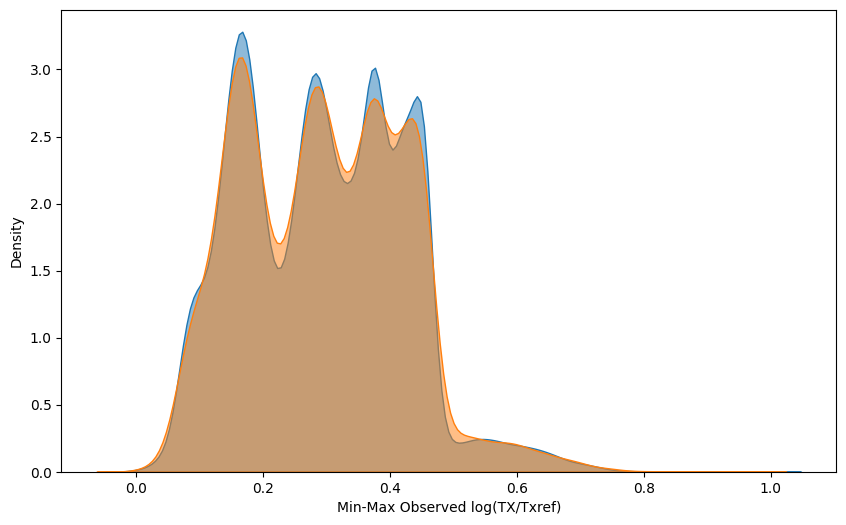

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Min-Max Observed log(TX/Txref)'], label='Train', fill=True, alpha=0.5, warn_singular=False)
sns.kdeplot(test_df['Min-Max Observed log(TX/Txref)'], label='Test', fill=True, alpha=0.5, warn_singular=False)
plt.xlabel('Min-Max Observed log(TX/Txref)')
plt.ylabel('Density')
plt.show()

In [44]:
train_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/Train.csv', index=False)
test_df.to_csv('Data/LaFleur Supp Data Seperated/Processed/Test.csv', index=False)